In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, AvgPool2D
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
model = Sequential()

model.add(Input(shape=(28, 28, 1))) 
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')) # layer 1
model.add(MaxPooling2D(pool_size=(2, 2))) # stride = (2,2)

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu')) # layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu')) # layer 3
model.add(Dense(64, activation='relu')) # layer 4
model.add(Dense(10, activation='softmax')) # layer 5

In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228,842 (893.91 KB)

 Trainable params: 228,842 (893.91 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
simpleModel_history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9480 - loss: 0.2190 - val_accuracy: 0.9759 - val_loss: 0.0740
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9807 - loss: 0.0633 - val_accuracy: 0.9834 - val_loss: 0.0532
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9841 - loss: 0.0545 - val_accuracy: 0.9856 - val_loss: 0.0511
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9879 - loss: 0.0396 - val_accuracy: 0.9850 - val_loss: 0.0543
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9895 - loss: 0.0371 - val_accuracy: 0.9848 - val_loss: 0.0552
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9900 - loss: 0.0324 - val_accuracy: 0.9880 - val_loss: 0.0406
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9926 - loss: 0.0254 - val_accuracy: 0.9881 - val_loss: 0.0427
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9929 - loss: 0

In [8]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9854 - loss: 0.0702
Loss: 0.0702, Accuracy: 0.9854


In [9]:
pred = model.predict(X_test, batch_size=32)
pred = tf.argmax(pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


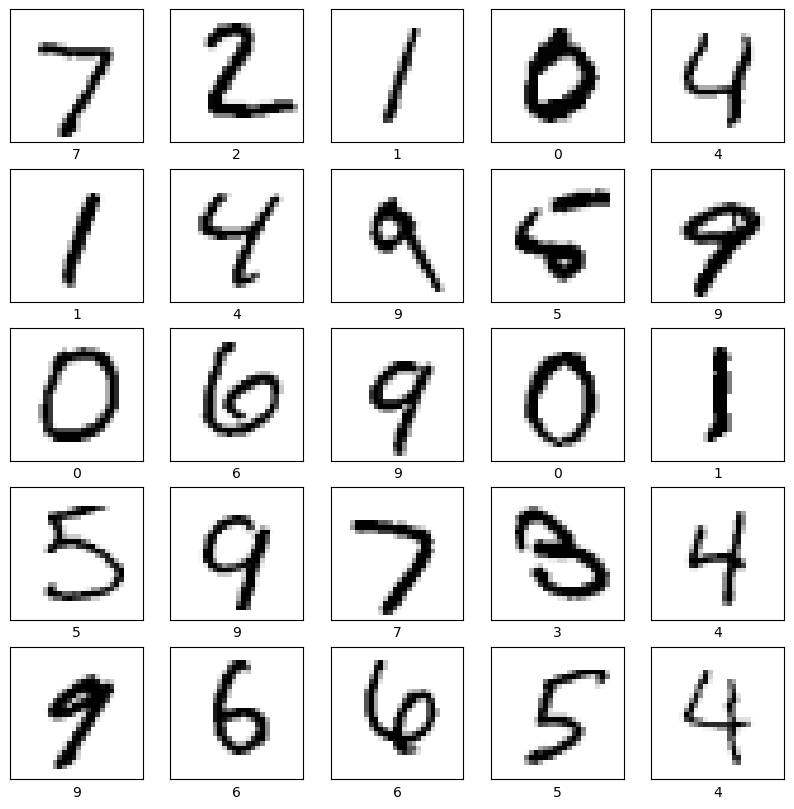

In [10]:
label = y_test

class_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10, 10))
for i in range(25):
	plt.subplot(5, 5, i+1)
	plt.imshow(X_test[i], cmap=plt.cm.binary)
	plt.xlabel(class_name[label[i]])
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)

## LeNet Architecture

In [11]:
leNet_model = Sequential()

leNet_model.add(Input(shape=(32, 32, 1)))
leNet_model.add(Conv2D(6, kernel_size=(5, 5), padding='valid', activation='tanh')) # layer 1
leNet_model.add(AvgPool2D(pool_size=(2, 2), strides=2))

leNet_model.add(Conv2D(16, kernel_size=(5, 5), padding='valid', activation='tanh')) # layer 2
leNet_model.add(AvgPool2D(pool_size=(2, 2), strides=2))

leNet_model.add(Flatten())
leNet_model.add(Dense(120, activation='tanh')) # layer 3
leNet_model.add(Dense(84, activation='tanh')) # layer 4
leNet_model.add(Dense(10, activation='softmax')) # layer 5

In [12]:
leNet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
leNet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
leNet_history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9950 - loss: 0.0175 - val_accuracy: 0.9845 - val_loss: 0.0790
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9949 - loss: 0.0171 - val_accuracy: 0.9882 - val_loss: 0.0619
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9960 - loss: 0.0137 - val_accuracy: 0.9880 - val_loss: 0.0566
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9952 - loss: 0.0192 - val_accuracy: 0.9907 - val_loss: 0.0472
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9959 - loss: 0.0149 - val_accuracy: 0.9843 - val_loss: 0.0828
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9961 - loss: 0.0159 - val_accuracy: 0.9869 - val_loss: 0.0687
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9958 - loss: 0.0160 - val_accuracy: 0.9871 - val_loss: 0.0669
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9971 - loss: 

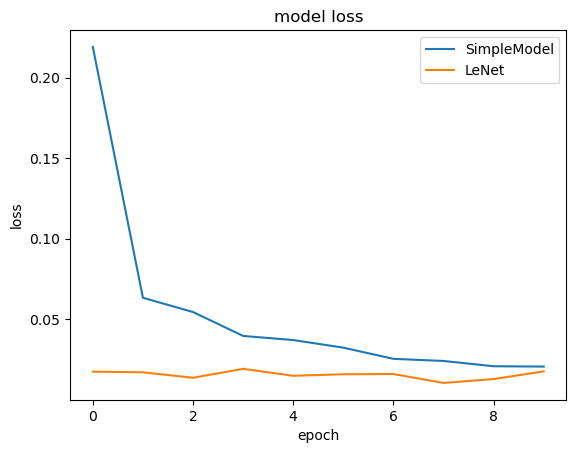

In [25]:
plt.plot(simpleModel_history.history['loss'])
plt.plot(leNet_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['SimpleModel', 'LeNet'])
plt.show()


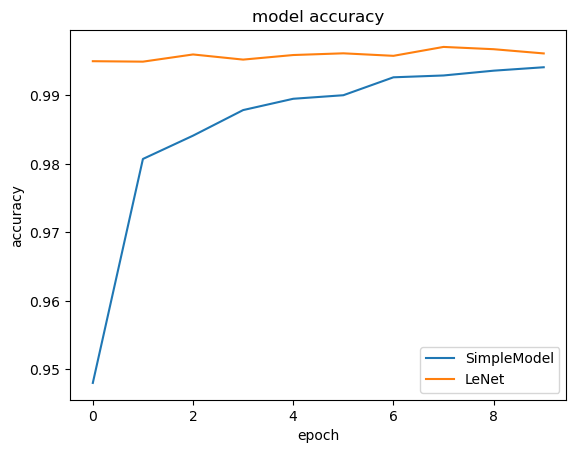

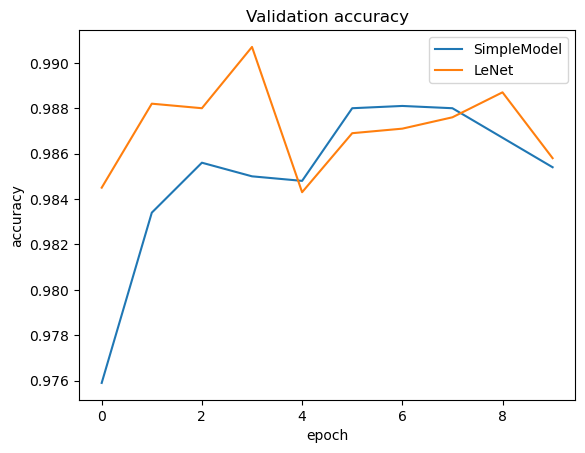

In [27]:
plt.plot(simpleModel_history.history['accuracy'])
plt.plot(leNet_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['SimpleModel', 'LeNet'])
plt.show()


plt.plot(simpleModel_history.history['val_accuracy'])
plt.plot(leNet_history.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['SimpleModel', 'LeNet'])
plt.show()
